# Distribution by Age


In [ ]:
#| hide
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('../../data/analysis/distribution_by_age.csv')
print(df.shape)

(107, 3)


In [ ]:
# skip the ones that are not in the right format.
df['dob'] = pd.to_datetime(df['dob'], format='mixed')

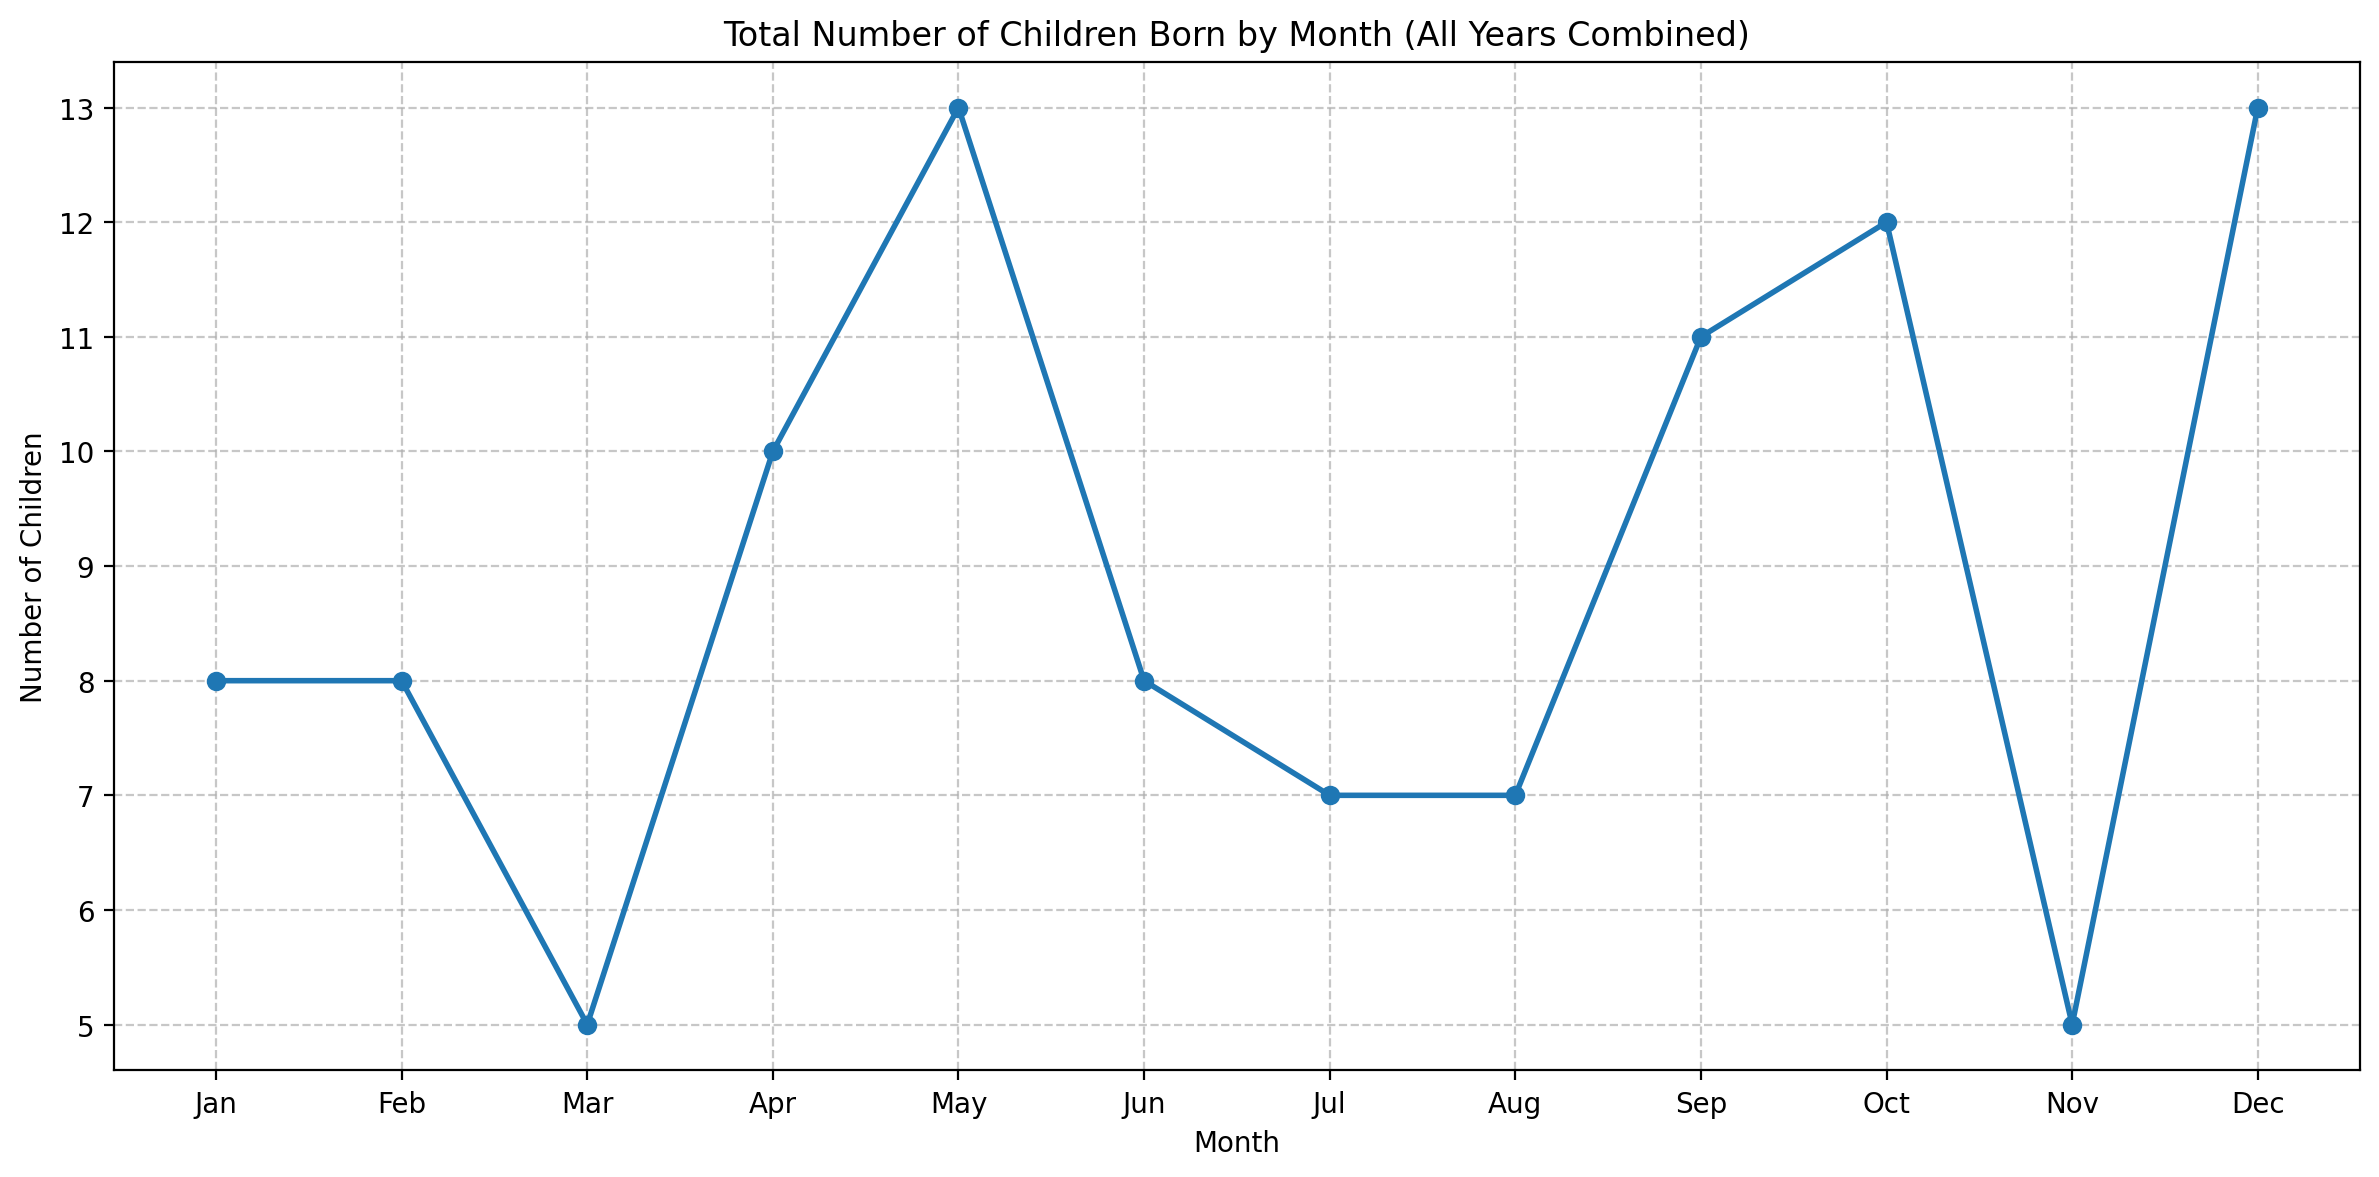

In [ ]:
# Extract month from dob
df['month'] = df['dob'].dt.month

# Count births by month (combining all years)
births_by_month = df.groupby('month').size()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(births_by_month.index, births_by_month.values, marker='o', color='#1f77b4', linewidth=2)

plt.title('Total Number of Children Born by Month (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Number of Children')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

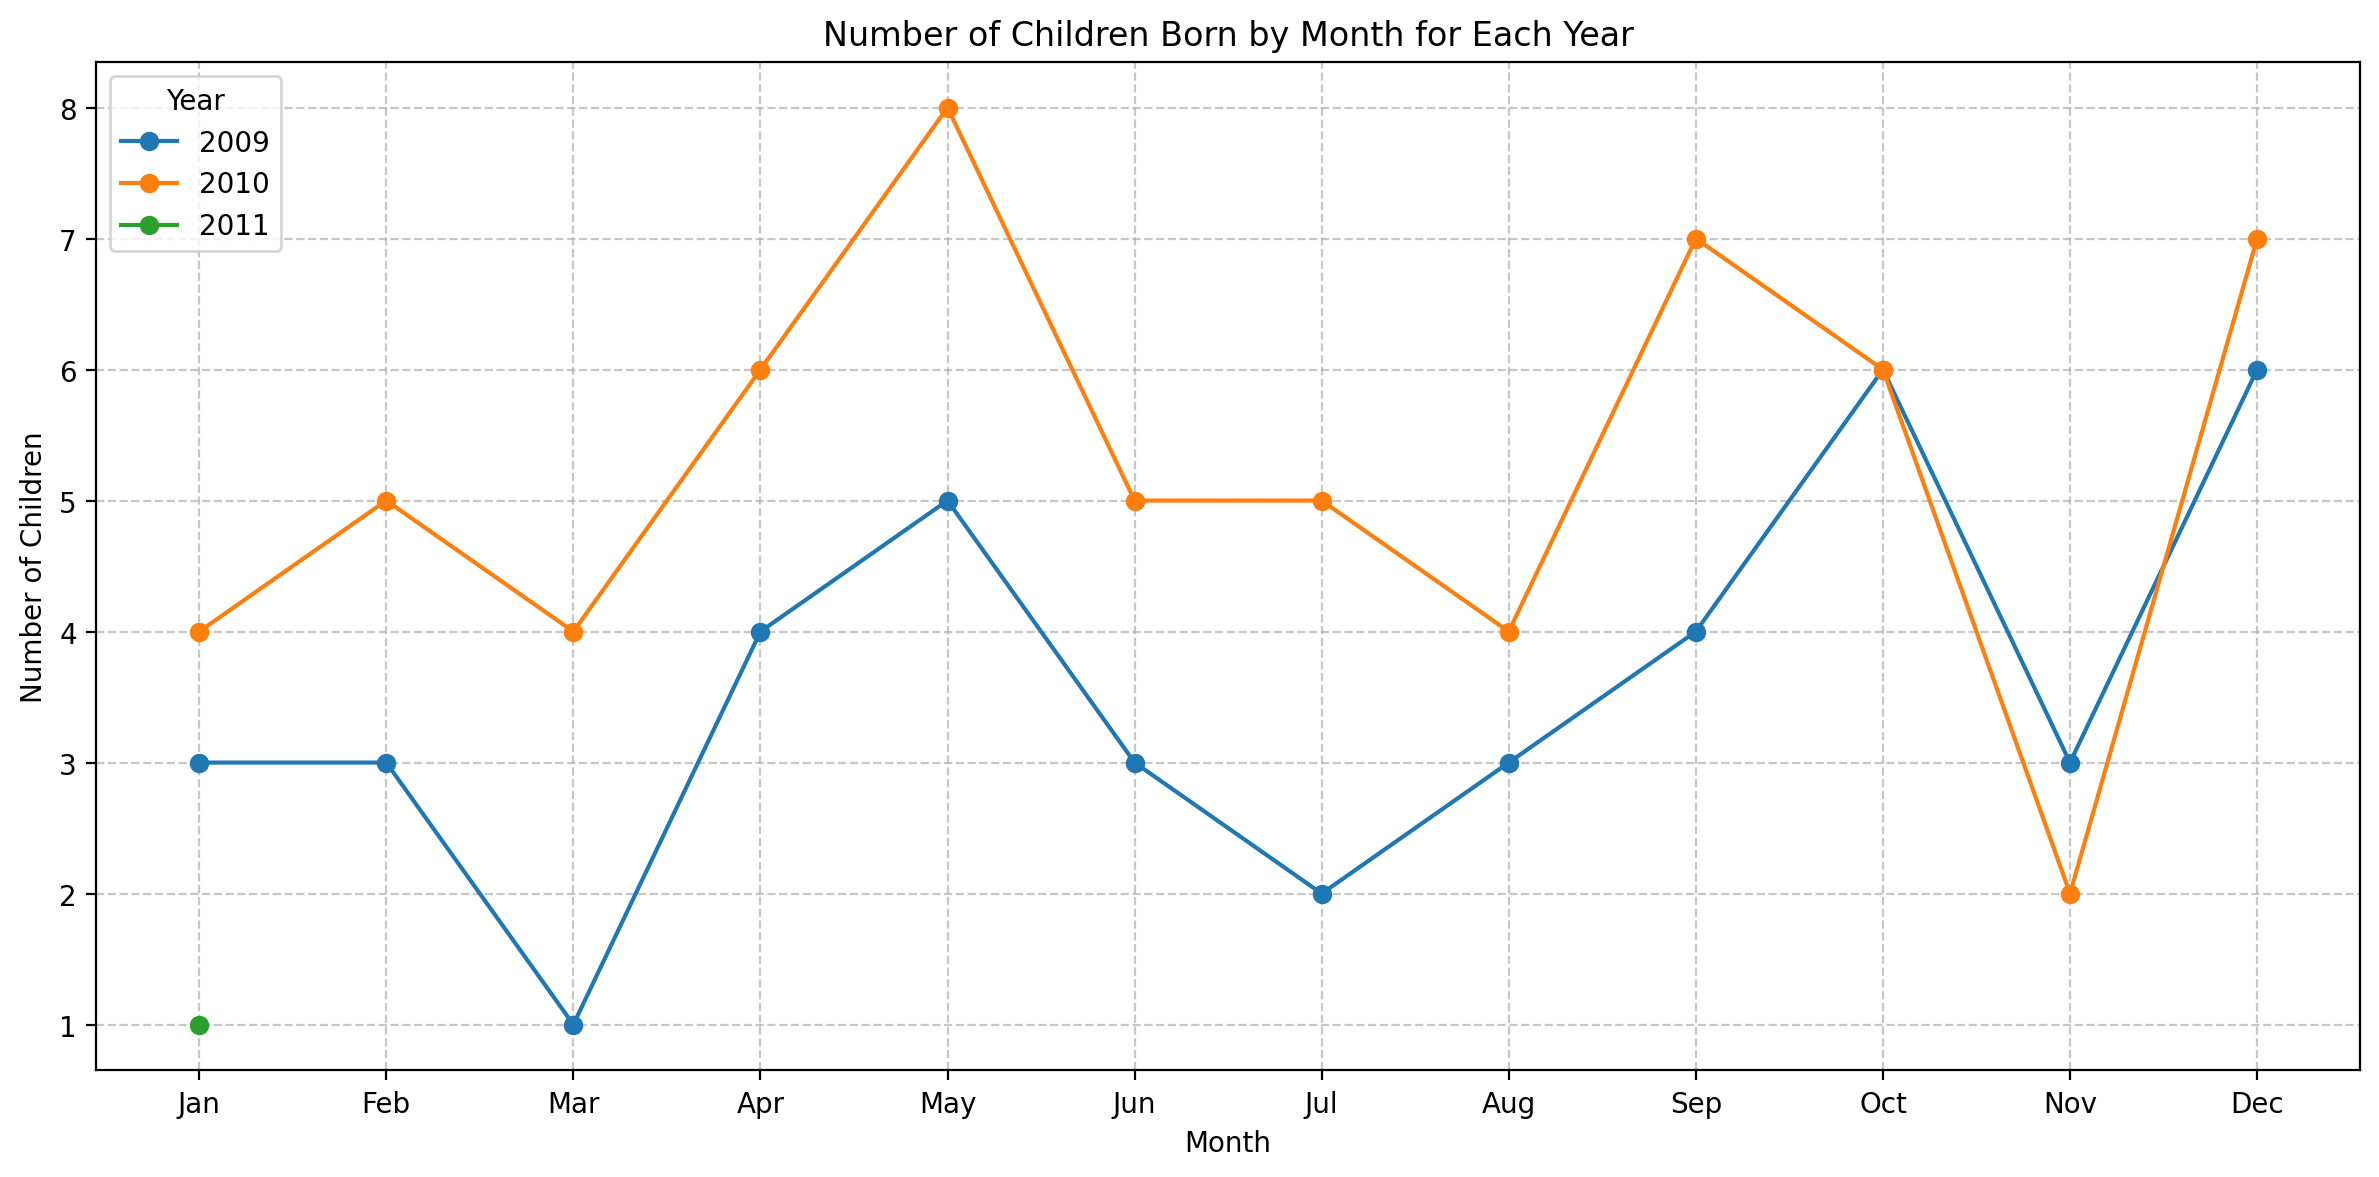

In [ ]:
# Histogram of children by month of birth for every year.
# Extract year and month from dob
df['year'] = df['dob'].dt.year
df['month'] = df['dob'].dt.month

# Count births by year and month
births_by_month = df.groupby(['year', 'month']).size().unstack(level=0)

# Plot line chart
plt.figure(figsize=(12, 6))
for year in births_by_month.columns:
    plt.plot(births_by_month.index, births_by_month[year], marker='o', label=str(year))

plt.title('Number of Children Born by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Children')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()